In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings
  
# ignoring warnings  
warnings.filterwarnings('ignore')

## Zadanie 1

1. Zdefiniowanie funkcji

In [2]:
def tri(x, a1, a2, a3):
    if x <= a1: 
        return 0
    if a1 <= x <= a2:
        return (x - a1) / (a2 - a1)
    if a2 <= x <= a3:
        return (a3 - x) / (a3 - a2)
    return 0 

def trap(x, a1, a2, a3, a4):
    if x <= a1:
        return 0
    if a1 <= x <= a2:
        return (x - a1) / (a2 - a1)
    if a2 <= x <= a3:
        return (a4 - x) / (a4 - a3)
    return 0

def rsig(x, b, a):
    return 1 / (1 + (np.e ** (-b * (x - a))))

def lsig(x, b, a):
    return 1 / (1 + (np.e ** (b * (x - a))))

def gauss(x, a, b):
    return (np.e)**-(((x-a) / b)**2)

2. Narysowanie wykresów

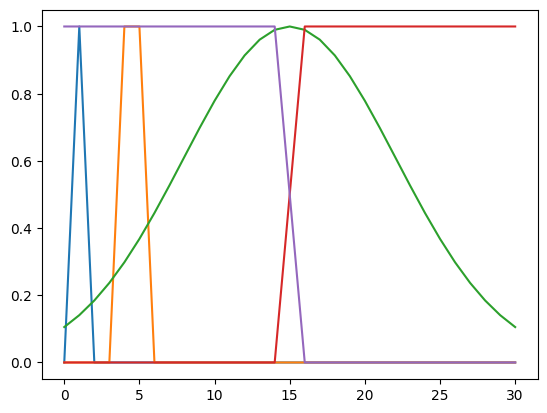

In [3]:
x = np.arange(0, 31)
y1 = [tri(v, 0, 1, 2) for v in x]
y2 = [trap(v, 3, 4, 5,6) for v in x]
y3 = [gauss(v, 15, 10) for v in x]
y4 = [rsig(v, 15, 15) for v in x]
y5 = [lsig(v, 15, 15) for v in x]

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)

## Zadanie 2

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# zmienna wejściowa
quality_of_service = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
# zmienna wyjściowa
tip = ctrl.Consequent(np.arange(0, 21, 1), 'tip')

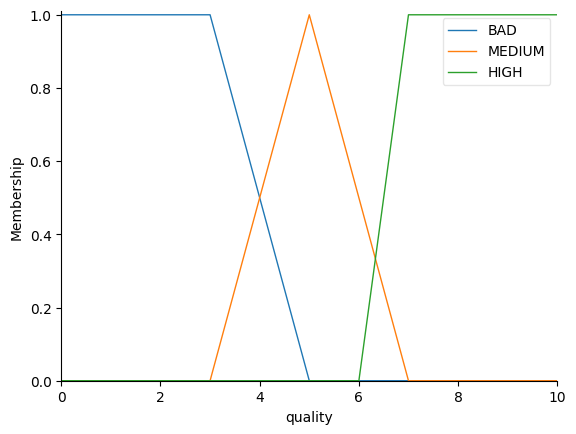

In [5]:
# funkcje przynależności do zmiennej wejściowej
quality_of_service['BAD'] = fuzz.trapmf(quality_of_service.universe, [0, 0, 3, 5])
quality_of_service['MEDIUM'] = fuzz.trimf(quality_of_service.universe, [3, 5, 7])
quality_of_service['HIGH'] = fuzz.trapmf(quality_of_service.universe, [6, 7, 10, 10])
quality_of_service.view()

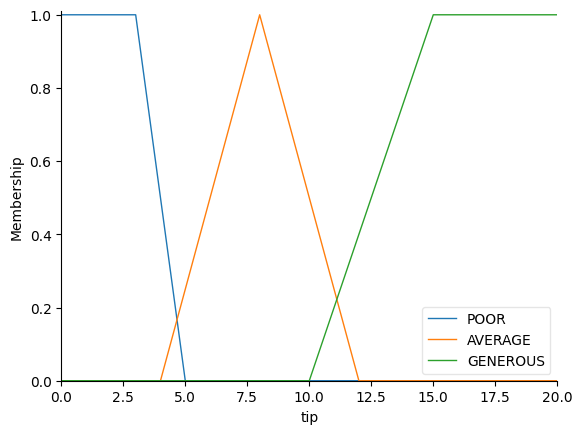

In [6]:
# funkcje przynależności do zmiennej wyjściowej
tip['POOR'] = fuzz.trapmf(tip.universe, [0, 0, 3, 5])
tip['AVERAGE'] = fuzz.trimf(tip.universe, [4, 8, 12])
tip['GENEROUS'] = fuzz.trapmf(tip.universe, [10, 15, 20, 20])
tip.view()

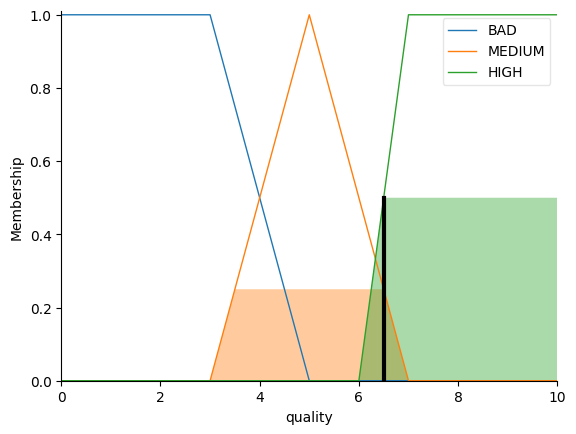

In [7]:
# reguły rozmyte
rule1 = ctrl.Rule(quality_of_service['BAD'], tip['POOR'])
rule2 = ctrl.Rule(quality_of_service['MEDIUM'], tip['AVERAGE'])
rule3 = ctrl.Rule(quality_of_service['HIGH'], tip['GENEROUS'])
# definiujemy sterownik rozmyty
# sterownik składa z reguł rozmytych
# ale same reguły składają się ze zdefiniowanych wcześniej
# wejść/wyjść
tipper_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# symulacja działania sterownika
tipper_simulation = ctrl.ControlSystemSimulation(tipper_ctrl)
# ustalamy wejście ostre (crisp)
tipper_simulation.input['quality'] = 6.5
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)

In [8]:
tipper_simulation.print_state()

 Antecedents 
Antecedent: quality                 = 6.5
  - BAD                             : 0.0
  - MEDIUM                          : 0.25
  - HIGH                            : 0.5

 Rules 
RULE #0:
  IF quality[BAD] THEN tip[POOR]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - quality[BAD]                                           : 0.0
                                              quality[BAD] = 0.0
  Activation (THEN-clause):
                                                 tip[POOR] : 0.0

RULE #1:
  IF quality[MEDIUM] THEN tip[AVERAGE]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - quality[MEDIUM]                                        : 0.25
                                           quality[MEDIUM] = 0.25
  Activation (THEN-clause):
                                              tip[AVERAGE] : 0.25

RULE #2:
  IF quality[HIGH] THEN tip[GENEROUS]
	AND aggregation function : fmin

In [ ]:
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])

Z reguł wynika, że dla *quality_of_service* wynoszącej 6.5 *tip* jest *average* w stopniu 0,25 oraz *generous* w stopniu 0,5. Natomiast jego ostre wyjście to 13,50. 

### Inne wartości *quality_of_service*

2.041666666666667


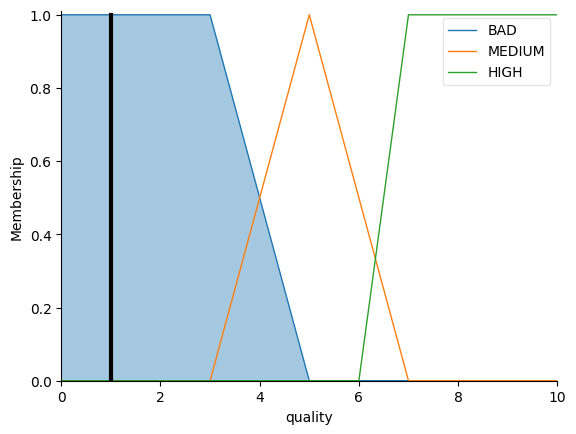

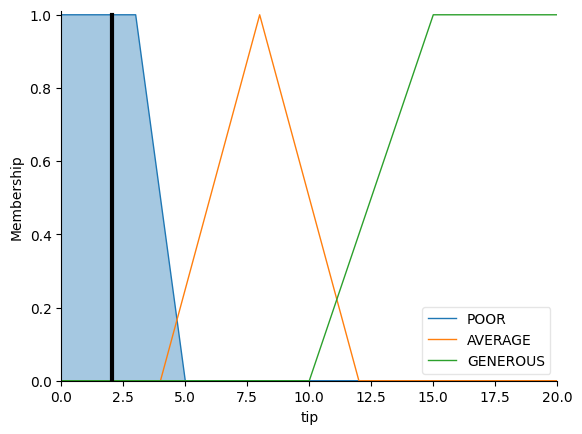

In [10]:
tipper_simulation.input['quality'] = 1
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])

5.53968253968254


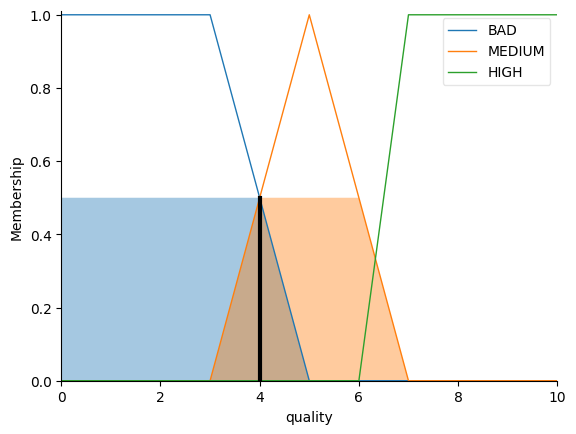

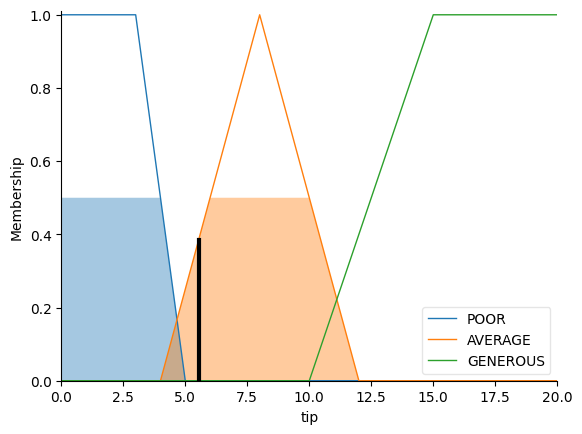

In [11]:
tipper_simulation.input['quality'] = 4
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])

8.0


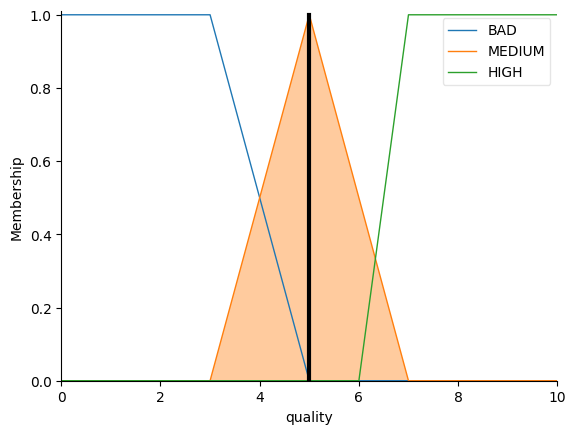

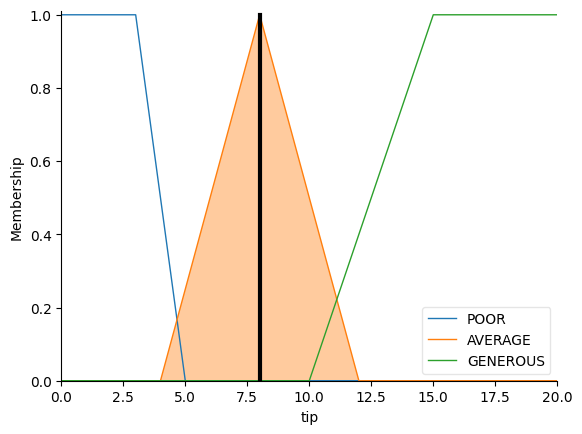

In [12]:
tipper_simulation.input['quality'] = 5
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])

16.11111111111111


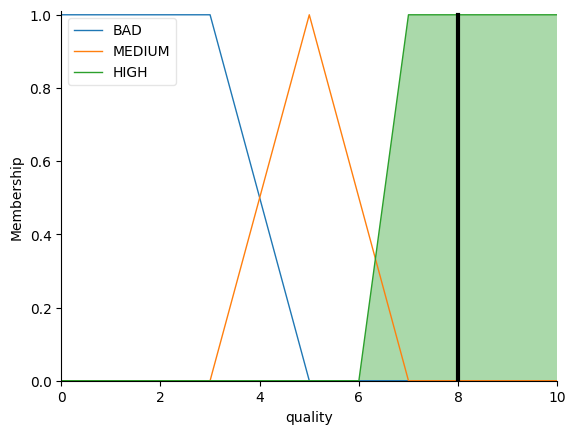

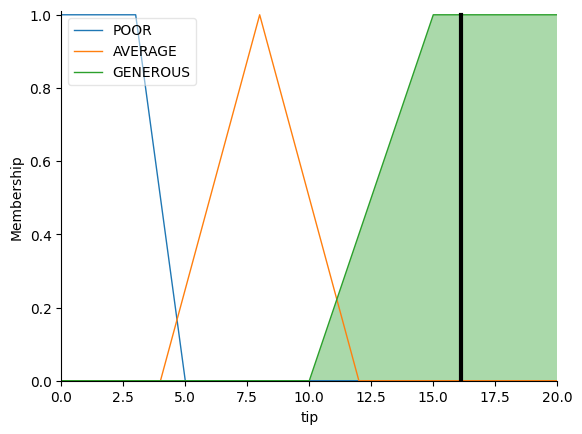

In [13]:
tipper_simulation.input['quality'] = 8
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])

16.11111111111111


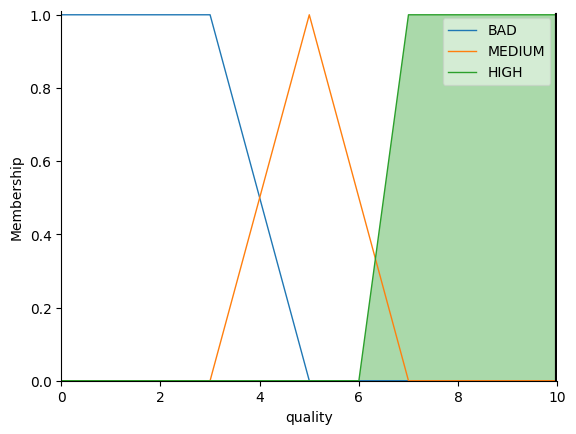

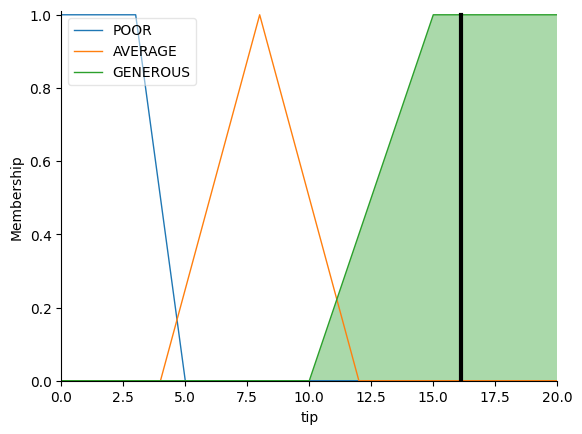

In [14]:
tipper_simulation.input['quality'] = 10
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])